# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [3]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

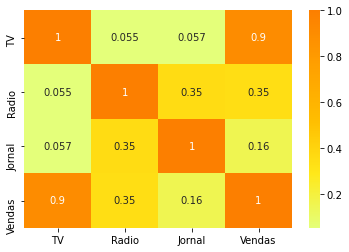

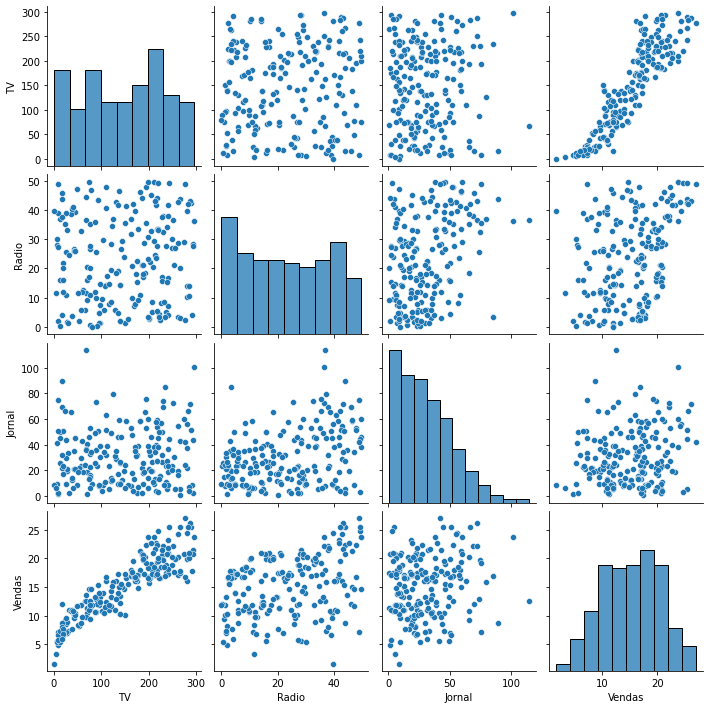

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quais são as características que possuem maior corelação com as vendas?

sns.heatmap(tabela.corr(), annot=True, cmap='Wistia')
plt.show()

sns.pairplot(tabela)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [9]:
from sklearn.model_selection import train_test_split

# informação que quero prever = y
# informações que me ajudam a chegar na previsão = x

y = tabela['Vendas']
x = tabela.drop('Vendas', axis=1) # todas as colunas menos a de Vendas

# amostra de teste já está bom entre 20% e 30%
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [10]:
# O desafio é fazer a previsão de um número (de vendas). Assim, o desafio é de regressão.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar as IAs
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar as IAs
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [11]:
from sklearn import metrics

# passar os dados de teste e criar a previsão
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos de previsão
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9628463072548867


#### Visualização Gráfica das Previsões

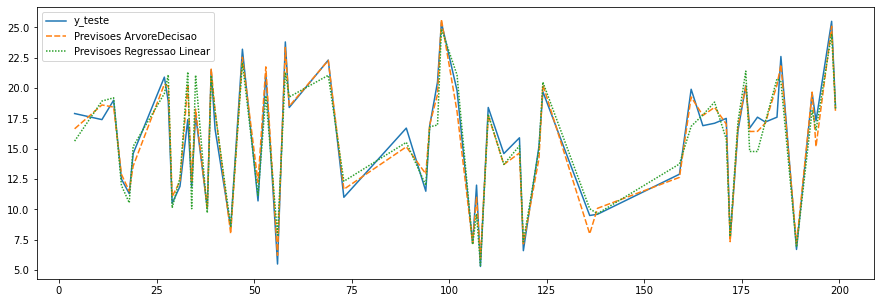

In [15]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsoes ArvoreDecisao'] = previsao_arvoredecisao
tabela_auxiliar['Previsoes Regressao Linear'] = previsao_regressaolinear

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Qual a importância de cada variável para as vendas?

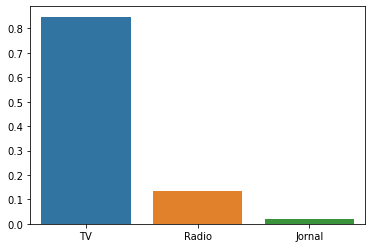

In [16]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

#### Será que estamos investindo certo?